
# Validación Cruzada para Clasificación

**Validación cruzada en clasficación:** muestreo estratificado

**cv** = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cross_validate(model, X, Y, cv=cv, scoring=('f1', 'accuracy','precision', 'recall'), return_train_score=True)


In [160]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preparación de Datos


In [161]:
#Cargamos los datos
data = pd.read_excel("ataque_corazon.xlsx",sheet_name=0)
data.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,smoking_status,stroke_ataque_corazon
0,1,No,No,No,122.04,Unknown,No
1,79,No,No,Yes,79.03,Unknown,No
2,40,No,No,Yes,60.96,'never smoked',No
3,4,No,No,No,107.25,Unknown,No
4,8,No,No,No,106.51,Unknown,No


In [162]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    5110 non-null   int64  
 1   hypertension           5110 non-null   object 
 2   heart_disease          5110 non-null   object 
 3   ever_married           5110 non-null   object 
 4   avg_glucose_level      5110 non-null   float64
 5   smoking_status         5110 non-null   object 
 6   stroke_ataque_corazon  5110 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 279.6+ KB


In [163]:
#Corrección de tipos de datos

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    5110 non-null   int64  
 1   hypertension           5110 non-null   object 
 2   heart_disease          5110 non-null   object 
 3   ever_married           5110 non-null   object 
 4   avg_glucose_level      5110 non-null   float64
 5   smoking_status         5110 non-null   object 
 6   stroke_ataque_corazon  5110 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 279.6+ KB


In [164]:
#Descripción de variables numéricas
data.describe()

,age,avg_glucose_level
count,5110.000000,5110.000000
mean,43.230528,106.147677
std,22.605333,45.283560
min,1.000000,55.120000
25%,25.000000,77.245000
50%,45.000000,91.885000
75%,61.000000,114.090000
max,82.000000,271.740000


<Axes: >

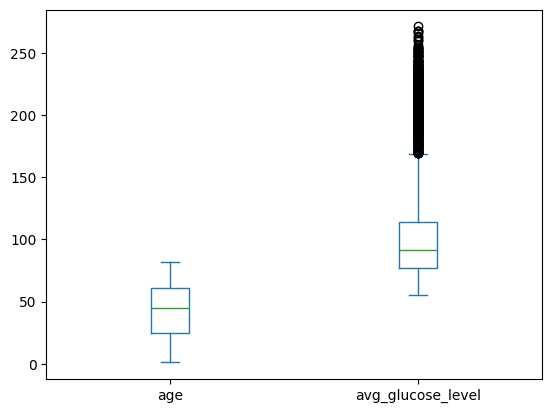

In [165]:
data.plot(kind='box')

<Axes: xlabel='stroke_ataque_corazon'>

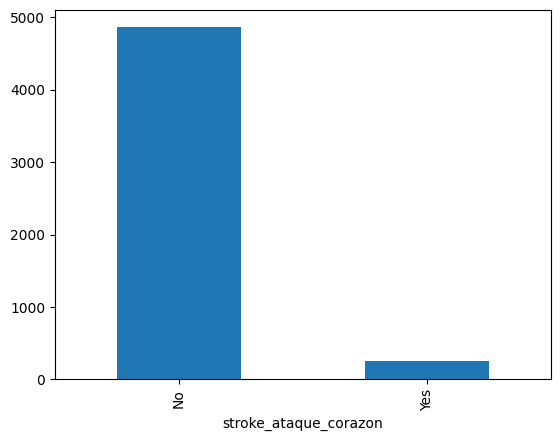

In [166]:
#Descripción variables categóricas
data['stroke_ataque_corazon'].value_counts().plot(kind='bar')

Balanceo

<Axes: xlabel='stroke_ataque_corazon'>

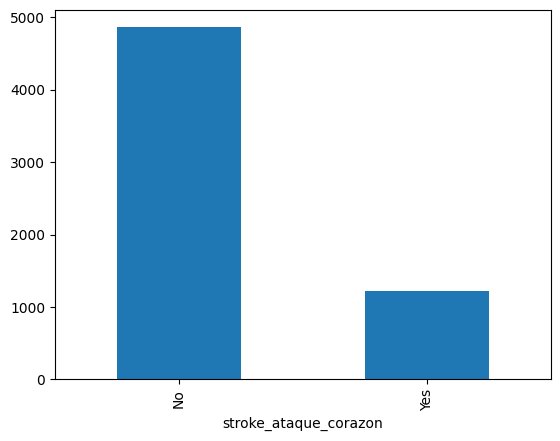

In [167]:
#Balanceo de datos
from imblearn.over_sampling import SMOTENC, SMOTE

#Se separa variables predictoras y objetivo
X = data.drop("stroke_ataque_corazon", axis = 1)
Y = data['stroke_ataque_corazon']

#Balanceo para variables predictoras con al menos una categoría
sm = SMOTENC(categorical_features=[1,2,3,5], k_neighbors=5, sampling_strategy=0.25) #se indican las variables categoricas

X_bal, Y_bal = sm.fit_resample(X,Y)

# Creamos un dataframe con los resultados (X_bal, Y_bal)
data  = pd.DataFrame(columns=X_bal.columns.values, data=X_bal)
data['stroke_ataque_corazon']=Y_bal
data['stroke_ataque_corazon'].value_counts().plot(kind='bar')

In [168]:
#Dummies para las variables predictoras
data = pd.get_dummies(data, columns=['smoking_status'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['hypertension','heart_disease','ever_married',], drop_first=True, dtype=int)

data.head()

,age,avg_glucose_level,stroke_ataque_corazon,smoking_status_'formerly smoked',smoking_status_'never smoked',smoking_status_Unknown,smoking_status_smokes,hypertension_Yes,heart_disease_Yes,ever_married_Yes
0,1,122.04,No,0,0,1,0,0,0,0
1,79,79.03,No,0,0,1,0,0,0,1
2,40,60.96,No,0,1,0,0,0,0,1
3,4,107.25,No,0,0,1,0,0,0,0
4,8,106.51,No,0,0,1,0,0,0,0


In [169]:
#LabelEncoder para la variable objetivo
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['stroke_ataque_corazon'] =labelencoder.fit_transform(data['stroke_ataque_corazon'])

data

,age,avg_glucose_level,stroke_ataque_corazon,smoking_status_'formerly smoked',smoking_status_'never smoked',smoking_status_Unknown,smoking_status_smokes,hypertension_Yes,heart_disease_Yes,ever_married_Yes
0,1,122.040000,0,0,0,1,0,0,0,0
1,79,79.030000,0,0,0,1,0,0,0,1
2,40,60.960000,0,0,1,0,0,0,0,1
3,4,107.250000,0,0,0,1,0,0,0,0
4,8,106.510000,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6071,57,84.058490,1,0,0,1,0,0,0,1
6072,70,211.436432,1,0,0,1,0,0,0,1
6073,73,70.420826,1,0,1,0,0,1,1,0
6074,65,225.572411,1,0,1,0,0,0,0,1


# 2. Validación Cruzada







In [170]:
#Validación Cruzada
from sklearn.model_selection import cross_validate, StratifiedKFold

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()
scoring=('f1_macro', 'accuracy','precision_macro', 'recall_macro')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) #Muestreo estratificado

In [171]:
#Se separa variables predictoras y objetivo
X = data.drop("stroke_ataque_corazon", axis = 1)
Y = data['stroke_ataque_corazon']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6076 entries, 0 to 6075
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               6076 non-null   int64  
 1   avg_glucose_level                 6076 non-null   float64
 2   smoking_status_'formerly smoked'  6076 non-null   int64  
 3   smoking_status_'never smoked'     6076 non-null   int64  
 4   smoking_status_Unknown            6076 non-null   int64  
 5   smoking_status_smokes             6076 non-null   int64  
 6   hypertension_Yes                  6076 non-null   int64  
 7   heart_disease_Yes                 6076 non-null   int64  
 8   ever_married_Yes                  6076 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 427.3 KB


# TREE

In [172]:
#Método de ML a usar en la validación cruzada
from sklearn import tree
modelTree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=4, max_depth=None)

scores = cross_validate(modelTree, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.019968,0.014581,0.741005,0.873288,0.845395,0.923555,0.760619,0.899658,0.726475,0.852484
1,0.022148,0.009666,0.710451,0.879557,0.822368,0.925933,0.721407,0.896397,0.701646,0.865176
2,0.016822,0.009459,0.698185,0.871100,0.822368,0.921909,0.721029,0.894825,0.683229,0.852024
3,0.017275,0.011249,0.754976,0.878205,0.848684,0.925018,0.765973,0.894463,0.745733,0.864262
4,0.020148,0.009780,0.760852,0.882597,0.847039,0.928310,0.761663,0.903016,0.760052,0.865632
5,0.017735,0.009934,0.729637,0.872111,0.843750,0.923555,0.763247,0.902946,0.708881,0.848591
6,0.017372,0.009793,0.717847,0.879979,0.820428,0.926312,0.718532,0.897876,0.717172,0.864827
7,0.016932,0.009891,0.766212,0.880550,0.858320,0.927043,0.782537,0.901021,0.753248,0.863571
8,0.018950,0.010249,0.728154,0.872566,0.835255,0.922838,0.742231,0.896928,0.717121,0.853059
9,0.016649,0.010798,0.721068,0.878935,0.828666,0.925946,0.730758,0.898586,0.713005,0.862542


In [173]:
# Promedios para evaluar overfitting comparando medidas de train y test
scores.mean()

#Cuidado overfitting, más de 5 puntos de diferencia

,0
fit_time,0.018400
score_time,0.010540
test_f1_macro,0.732839
train_f1_macro,0.876889
test_accuracy,0.837227
train_accuracy,0.925042
test_precision_macro,0.746800
train_precision_macro,0.898572
test_recall_macro,0.722656
train_recall_macro,0.859217


In [174]:
#Se almacena en el df la medida a comparar
comparacion_CV['Tree']=scores['test_f1_macro']
print(comparacion_CV)

       Tree
0  0.741005
1  0.710451
2  0.698185
3  0.754976
4  0.760852
5  0.729637
6  0.717847
7  0.766212
8  0.728154
9  0.721068


# KNN

In [175]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
var_num=['age','avg_glucose_level']
min_max_scaler.fit(X[var_num]) #Ajuste de los parametros: max - min
X[var_num]= min_max_scaler.transform(X[var_num]) #70%
X.head()

,age,avg_glucose_level,smoking_status_'formerly smoked',smoking_status_'never smoked',smoking_status_Unknown,smoking_status_smokes,hypertension_Yes,heart_disease_Yes,ever_married_Yes
0,0.000000,0.308928,0,0,1,0,0,0,0
1,0.962963,0.110378,0,0,1,0,0,0,1
2,0.481481,0.026960,0,1,0,0,0,0,1
3,0.037037,0.240652,0,0,1,0,0,0,0
4,0.086420,0.237236,0,0,1,0,0,0,0


In [176]:
#Validación Cruzada

#Método Perezoso
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')


scores = cross_validate(model_knn, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores



,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.011593,0.025444,0.820336,0.892318,0.886513,0.929590,0.823435,0.884525,0.817359,0.900811
1,0.010203,0.024338,0.804398,0.892877,0.873355,0.929956,0.801698,0.884836,0.807208,0.901664
2,0.008788,0.023734,0.785083,0.894452,0.850329,0.931236,0.767408,0.887647,0.811222,0.901778
3,0.008931,0.024273,0.772061,0.895821,0.851974,0.932151,0.768886,0.889110,0.775417,0.903036
4,0.009907,0.024507,0.813430,0.892452,0.879934,0.929956,0.812480,0.885798,0.814393,0.899605
5,0.009583,0.025002,0.821462,0.892942,0.886513,0.930322,0.824535,0.886515,0.818508,0.899834
6,0.010490,0.024963,0.795945,0.897417,0.859967,0.933443,0.779106,0.892250,0.819449,0.902874
7,0.008788,0.023663,0.809705,0.894212,0.874794,0.931066,0.801214,0.887536,0.819398,0.901388
8,0.008618,0.023486,0.793354,0.888770,0.856672,0.927592,0.774938,0.882535,0.820495,0.895447
9,0.009040,0.024158,0.746627,0.896525,0.835255,0.932529,0.742380,0.889575,0.751258,0.904016


In [177]:
# Promedios para evaluar overfitting comparando medidas de train y test
scores.mean()

#Cuidado overfitting, más de 5 puntos de diferencia

,0
fit_time,0.009594
score_time,0.024357
test_f1_macro,0.796240
train_f1_macro,0.893779
test_accuracy,0.865531
train_accuracy,0.930784
test_precision_macro,0.789608
train_precision_macro,0.887033
test_recall_macro,0.805471
train_recall_macro,0.901045


In [178]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_f1_macro']
print(comparacion_CV)

       Tree       Knn
0  0.741005  0.820336
1  0.710451  0.804398
2  0.698185  0.785083
3  0.754976  0.772061
4  0.760852  0.813430
5  0.729637  0.821462
6  0.717847  0.795945
7  0.766212  0.809705
8  0.728154  0.793354
9  0.721068  0.746627


# NN

In [179]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Red neuronal
from sklearn.neural_network import MLPClassifier
model_rn = MLPClassifier(activation="relu",hidden_layer_sizes=(16), learning_rate='constant',
                     learning_rate_init=0.02, momentum= 0.3, max_iter=500, verbose=False)


scores = cross_validate(model_rn, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores



,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,1.019799,0.010754,0.729893,0.746903,0.840461,0.844184,0.752401,0.757849,0.714078,0.737755
1,0.837025,0.014672,0.717633,0.719534,0.840461,0.844916,0.759476,0.770858,0.694546,0.693408
2,1.045947,0.019716,0.723017,0.740576,0.828947,0.848756,0.732676,0.770617,0.714970,0.720860
3,2.173395,0.010887,0.751687,0.749316,0.848684,0.847842,0.766970,0.764821,0.739594,0.737104
4,1.495161,0.010426,0.703780,0.717882,0.840461,0.841258,0.767392,0.760297,0.676128,0.694554
5,1.228818,0.010761,0.729893,0.749415,0.840461,0.846928,0.754746,0.762771,0.712963,0.738591
6,0.963912,0.009782,0.634223,0.642743,0.822076,0.832328,0.733690,0.783416,0.612684,0.617570
7,0.773734,0.009487,0.705518,0.718596,0.841845,0.843664,0.768201,0.767616,0.677788,0.693207
8,1.082321,0.009686,0.693417,0.694976,0.840198,0.840922,0.770669,0.774264,0.664345,0.665443
9,1.203196,0.010150,0.667666,0.712094,0.810544,0.834705,0.695755,0.745026,0.652034,0.692405


In [180]:
# Promedios para evaluar overfitting comparando medidas de train y test
scores.mean()

,0
fit_time,1.182331
score_time,0.011632
test_f1_macro,0.705673
train_f1_macro,0.719203
test_accuracy,0.835414
train_accuracy,0.842550
test_precision_macro,0.750197
train_precision_macro,0.765753
test_recall_macro,0.685913
train_recall_macro,0.699090


In [181]:
#Se almacena en el df la medida a comparar
comparacion_CV['Nn']=scores['test_f1_macro']
print(comparacion_CV)

       Tree       Knn        Nn
0  0.741005  0.820336  0.729893
1  0.710451  0.804398  0.717633
2  0.698185  0.785083  0.723017
3  0.754976  0.772061  0.751687
4  0.760852  0.813430  0.703780
5  0.729637  0.821462  0.729893
6  0.717847  0.795945  0.634223
7  0.766212  0.809705  0.705518
8  0.728154  0.793354  0.693417
9  0.721068  0.746627  0.667666


<Axes: >

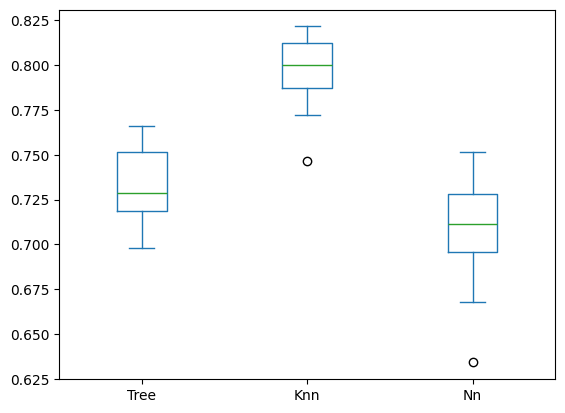

In [182]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box')

# 3. Hipótesis

H₀ (nula): No hay diferencia significativa en el desempeño (test_f1) entre los modelos.

H₁ (alternativa): Al menos un modelo tiene un desempeño significativamente diferente.

Se puede usar:
* ANOVA + Tukey
* Friedman + Nemenyi

Nota: Si no existe diferencia estadística significativa se selecciona el modelo por complejidad computacional.

In [183]:
comparacion_CV

,Tree,Knn,Nn
0,0.741005,0.820336,0.729893
1,0.710451,0.804398,0.717633
2,0.698185,0.785083,0.723017
3,0.754976,0.772061,0.751687
4,0.760852,0.813430,0.703780
5,0.729637,0.821462,0.729893
6,0.717847,0.795945,0.634223
7,0.766212,0.809705,0.705518
8,0.728154,0.793354,0.693417
9,0.721068,0.746627,0.667666


# 4. Modelo final con todos los datos

In [184]:
#Tree

modelTree.fit(min_max_scaler.inverse_transform(X[var_num]), Y) #100%

DecisionTreeClassifier(min_samples_leaf=4)

[Text(0.4110525777903152, 0.9807692307692307, 'age <= 56.5\ngini = 0.32\nsamples = 6076\nvalue = [4861, 1215]\nclass = No'),
 Text(0.14912312576499387, 0.9423076923076923, 'age <= 44.5\ngini = 0.105\nsamples = 3653\nvalue = [3449, 204]\nclass = No'),
 Text(0.2800878517776545, 0.9615384615384615, 'True  '),
 Text(0.0401468788249694, 0.9038461538461539, 'age <= 37.5\ngini = 0.026\nsamples = 2557\nvalue = [2523, 34]\nclass = No'),
 Text(0.022031823745410038, 0.8653846153846154, 'avg_glucose_level <= 80.495\ngini = 0.01\nsamples = 2034\nvalue = [2024, 10]\nclass = No'),
 Text(0.0200734394124847, 0.8269230769230769, 'avg_glucose_level <= 80.365\ngini = 0.028\nsamples = 706\nvalue = [696, 10]\nclass = No'),
 Text(0.018115055079559364, 0.7884615384615384, 'age <= 31.5\ngini = 0.025\nsamples = 702\nvalue = [693, 9]\nclass = No'),
 Text(0.01077111383108935, 0.75, 'age <= 1.5\ngini = 0.017\nsamples = 569\nvalue = [564, 5]\nclass = No'),
 Text(0.003916768665850673, 0.7115384615384616, 'avg_glucos

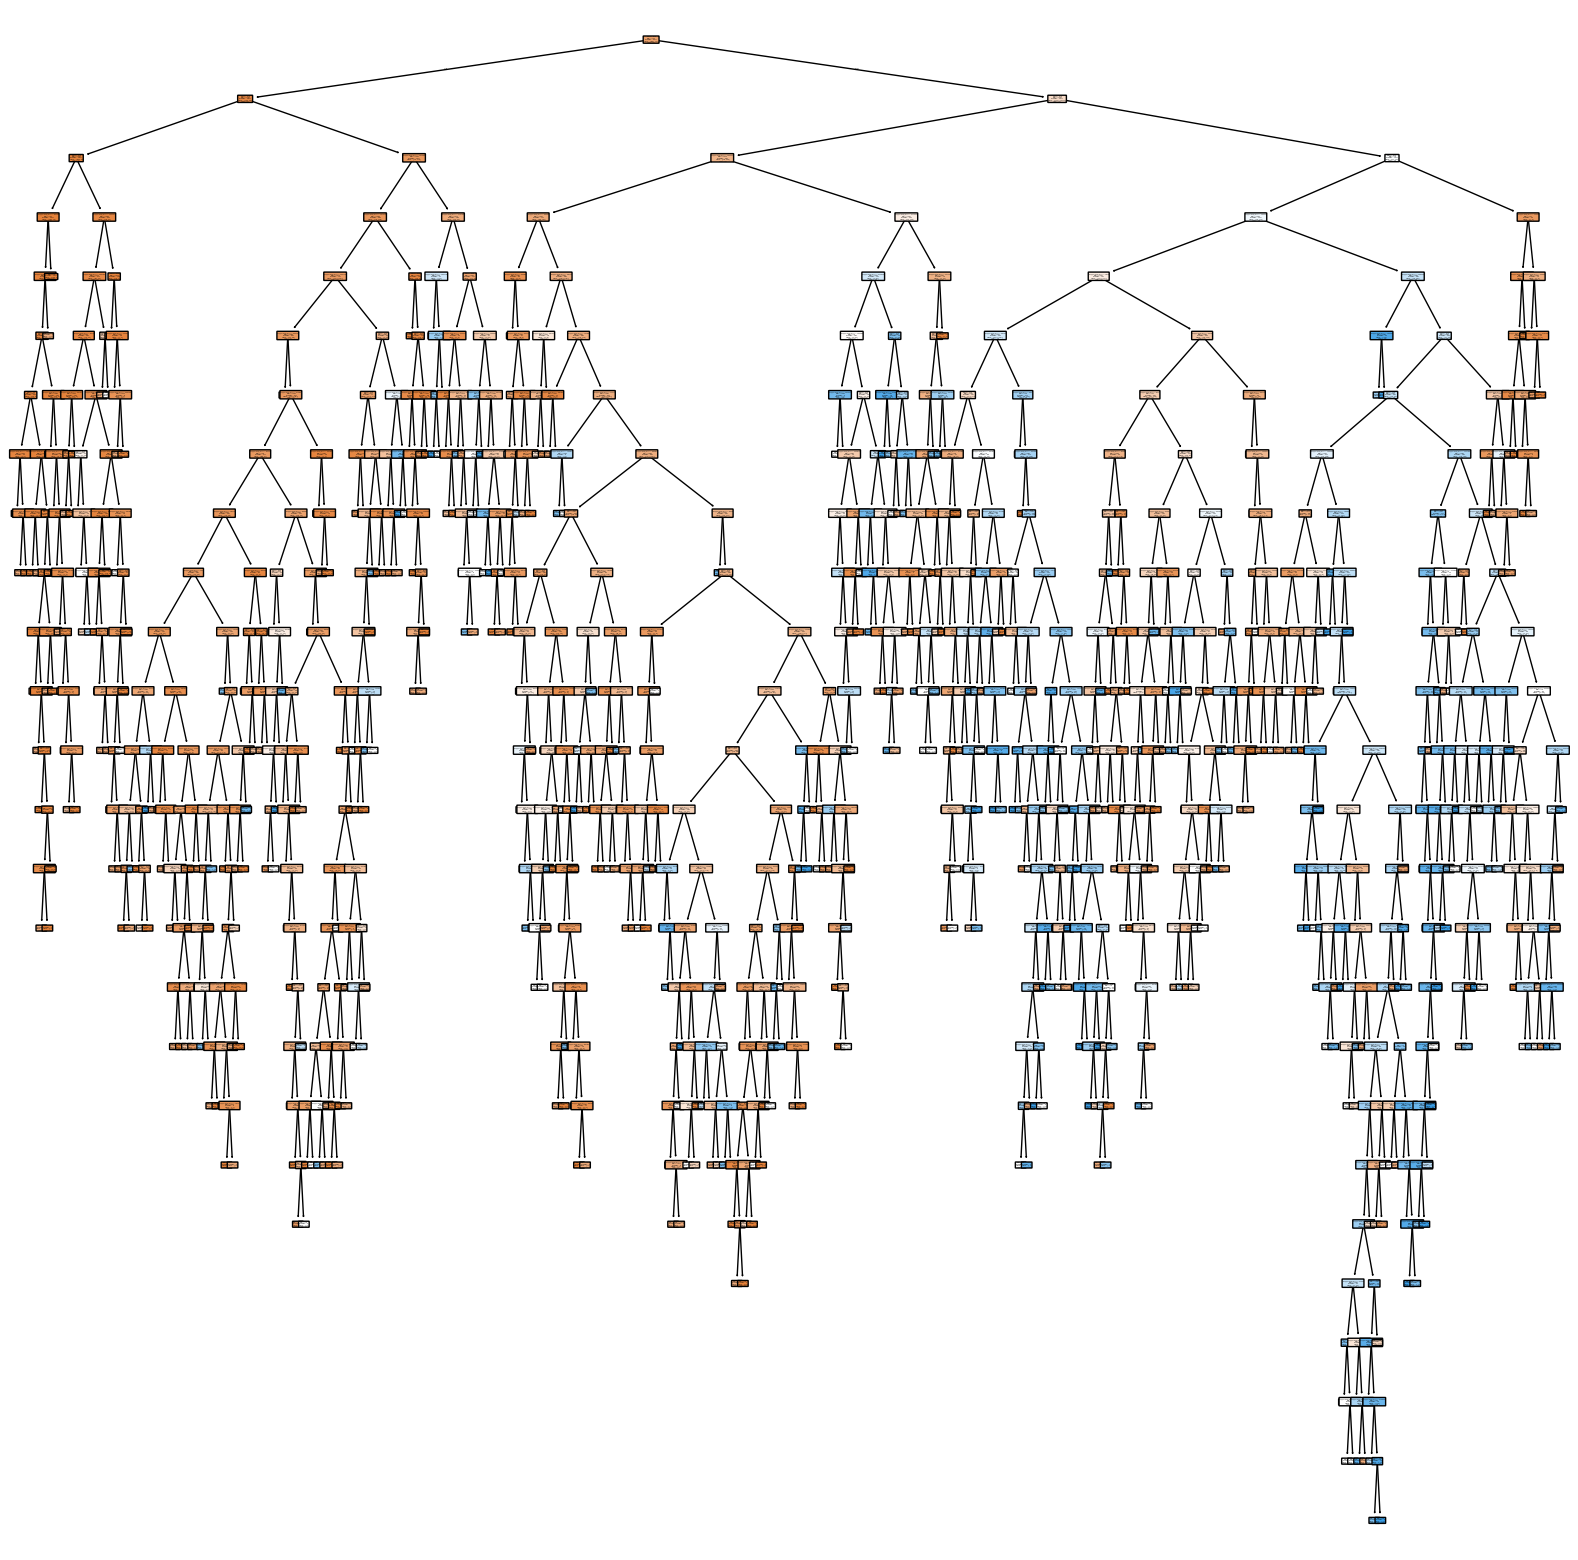

In [185]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(modelTree, feature_names=X.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)

In [186]:

#Knn
model_knn.fit(X, Y) #100%


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [187]:

#NN
model_rn.fit(X, Y) #100%

MLPClassifier(hidden_layer_sizes=16, learning_rate_init=0.02, max_iter=500,
              momentum=0.3)

# 4. Guardamos el modelo

In [188]:
import pickle
filename = 'modelo.pkl'
variables=X.columns._values
pickle.dump([model_rn,labelencoder,variables,min_max_scaler], open(filename, 'wb'))